In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
import seaborn as sns

In [21]:



df = pd.read_csv('adult.data', index_col=False, names=['age', 'work', 'fnlwgt', 'education', 'education-num', 'mari', 'occupation', 'relationship', 'race', 'sex', 'cg', 'cl', 'hw', 'na', '5k'])


In [41]:
# sns.countplot(x = '5k', hue='sex', data=df)
# sns.heatmap(df.corr(), annot=True, cmap='summer_r', linewidths=0.2)
# plt.figure(figsize=(10,10))
# sns.violinplot(x = 'race', y = 'age', hue='5k', data=df, split=True)

Y = df['5k'].values.tolist()
Y = [1 if i == ' <=50K' else 0 for i in Y]
Y = to_categorical(Y)
print(Y)


[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [50]:
X = df.drop(['age', 'fnlwgt', 'education-num', 'cg', 'cl', 'hw', '5k'], axis=1)

X = pd.get_dummies(X, drop_first=True)
X = pd.concat([X, df[['age', 'fnlwgt', 'education-num', 'cg', 'cl', 'hw']]], axis=1)

scaler = MinMaxScaler()

X[['age', 'fnlwgt', 'education-num', 'cg', 'cl', 'hw']] = scaler.fit_transform(X[['age', 'fnlwgt', 'education-num', 'cg', 'cl', 'hw']])

X
Y

,work_ Federal-gov,work_ Local-gov,work_ Never-worked,work_ Private,work_ Self-emp-inc,work_ Self-emp-not-inc,work_ State-gov,work_ Without-pay,education_ 11th,education_ 12th,...,na_ Trinadad&Tobago,na_ United-States,na_ Vietnam,na_ Yugoslavia,age,fnlwgt,education-num,cg,cl,hw
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [53]:
X_train = X[:-1000]
X_test = X[-1000:]

Y_train = Y[:-1000]
Y_test = Y[-1000:]

X_test.shape

(1000, 100)

In [62]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(100,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

# adam
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# X_train <-- 0.2
hist = model.fit(X_train, Y_train, epochs=5, validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1024)              103424    
                                                                 
 dense_14 (Dense)            (None, 512)               524800    
                                                                 
 dense_15 (Dense)            (None, 128)               65664     
                                                                 
 dense_16 (Dense)            (None, 2)                 258       
                                                                 
Total params: 694,146
Trainable params: 694,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
789/789 [==============================] - 8s 9ms/step - loss: 0.4272 - acc: 0.8013 - val_loss: 0.3786 - val_acc: 0.8273
Epoch 2/5
789/789 [==============================

{'loss': [0.42718762159347534, 0.36570030450820923, 0.3538563549518585, 0.3469444811344147, 0.3425951302051544], 'acc': [0.8013308048248291, 0.8318678736686707, 0.8352344632148743, 0.8370168209075928, 0.8391159772872925], 'val_loss': [0.3785845637321472, 0.36533451080322266, 0.35145944356918335, 0.34619230031967163, 0.3433246910572052], 'val_acc': [0.8273404240608215, 0.8293996453285217, 0.8336765170097351, 0.841279923915863, 0.8463488221168518]}


Text(0.5, 1.0, 'loss')

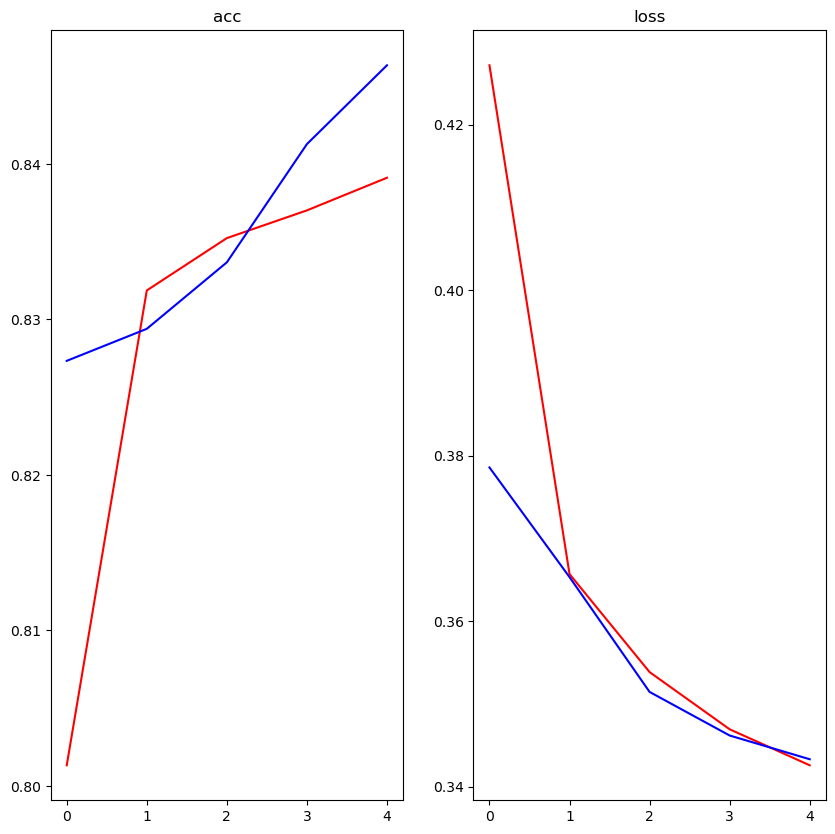

In [63]:
print(hist.history)

plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
plt.plot(hist.history['acc'], color='r')
plt.plot(hist.history['val_acc'], color='b')
plt.title('acc')

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')


In [65]:
score = model.evaluate(X_test, Y_test)
pred = model.predict(X_test)
# print(score)

print(pred[:10])
print(Y[:10])

32/32 [==============================] - 0s 4ms/step
[[0.85699105 0.14300896]
 [0.05984474 0.94015527]
 [0.5211828  0.47881725]
 [0.05900725 0.9409928 ]
 [0.8713774  0.12862262]
 [0.0279775  0.97202253]
 [0.02220013 0.9777999 ]
 [0.01128934 0.9887107 ]
 [0.41434732 0.5856527 ]
 [0.01634849 0.9836516 ]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
